In [5]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [3]:
# Database connection information
user = 'dsbc_student'
pw = '7*.8G9QH21'
host = '142.93.121.174'
port = '5432'
db = 'weatherinszeged'

In [4]:
# Establish and dispose connection
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(user, pw, host, port, db))

weather = pd.read_sql_query('select * from weatherinszeged', con=engine)

engine.dispose()

In [6]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
date                   96453 non-null datetime64[ns, UTC]
summary                96453 non-null object
preciptype             96453 non-null object
temperature            96453 non-null float64
apparenttemperature    96453 non-null float64
humidity               96453 non-null float64
windspeed              96453 non-null float64
windbearing            96453 non-null float64
visibility             96453 non-null float64
loudcover              96453 non-null float64
pressure               96453 non-null float64
dailysummary           96453 non-null object
dtypes: datetime64[ns, UTC](1), float64(8), object(3)
memory usage: 8.8+ MB


In [16]:
# Independent and dependent variables
X = weather[['humidity', 'windspeed', 'windbearing', 'pressure']]
Y = weather['temperature']

In [17]:
# Linear Regression model
lrm = LinearRegression()
lrm.fit(X, Y)
predictions = lrm.predict(X)
print('Coefficients: \n', lrm.coef_)
print('Intercept: \n', lrm.intercept_)

Coefficients: 
 [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]
Intercept: 
 37.92643818528557


### Gauss Markov Linear Assumptions 

Assumption One: linearity of the model in its coefficients

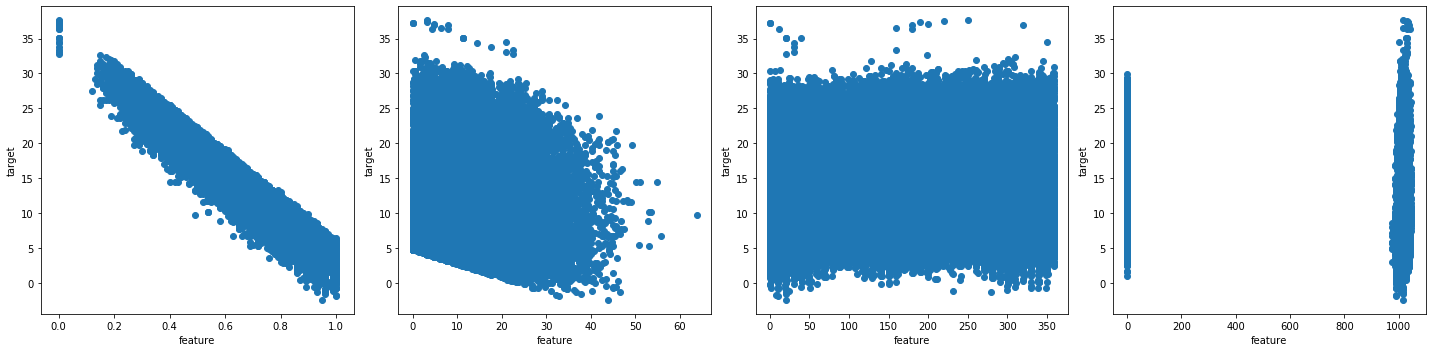

In [40]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.scatter(X['humidity'], predictions)
plt.xlabel('feature')
plt.ylabel('target')

plt.subplot(1, 4, 2)
plt.scatter(X['windspeed'], predictions)
plt.xlabel('feature')
plt.ylabel('target')

plt.subplot(1, 4, 3)
plt.scatter(X['windbearing'], predictions)
plt.xlabel('feature')
plt.ylabel('target')

plt.subplot(1, 4, 4)
plt.scatter(X['pressure'], predictions)
plt.xlabel('feature')
plt.ylabel('target')

plt.tight_layout()
plt.show()

Assumption Two: the error term should be zero on average

In [21]:
errors = Y - predictions
print('Mean of the errors in the model is {}'.format(np.mean(errors)))

Mean of the errors in the model is -5.24908630046242e-15


As seen above, the average of the model's error is essentially zero.

Assumption Three: homoscedasticity

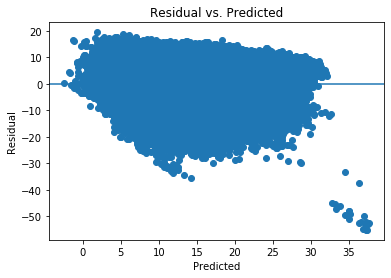

In [22]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

While some consistency in error variance does exist, I don't think through visualization we can conclusively say whether we pass the assumption of homoscedasticity without taking a look at statistical tests.

In [23]:
from scipy.stats import bartlett, levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 2464.84 and p value is 0
Levene test statistic value is 2321.24 and p value is 0


The null hypothesis for the Bartlett test and Levene test is homoscedasticity, but since the p-value is 0 and below 0.05 we have to reject the null hypothesis and conclude heteroscedasticity.

Assumption Four: low multicollinearity

In [26]:
weather[['temperature', 'humidity', 'windspeed', 'windbearing', 'pressure']].corr()

,temperature,humidity,windspeed,windbearing,pressure
temperature,1.000000,-0.632255,0.008957,0.029988,-0.005447
humidity,-0.632255,1.000000,-0.224951,0.000735,0.005454
windspeed,0.008957,-0.224951,1.000000,0.103822,-0.049263
windbearing,0.029988,0.000735,0.103822,1.000000,-0.011651
pressure,-0.005447,0.005454,-0.049263,-0.011651,1.000000


Reviewing the correlation matrix, mulitcollinearity is low.

Assumption Five: error terms should be uncorrelated with one another

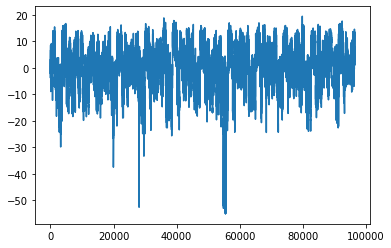

In [27]:
plt.plot(errors)
plt.show()

Due to the randomness, it seems that the error terms of the model are uncorrelated.

Assumption Six: features shouldn't be correlated with errors

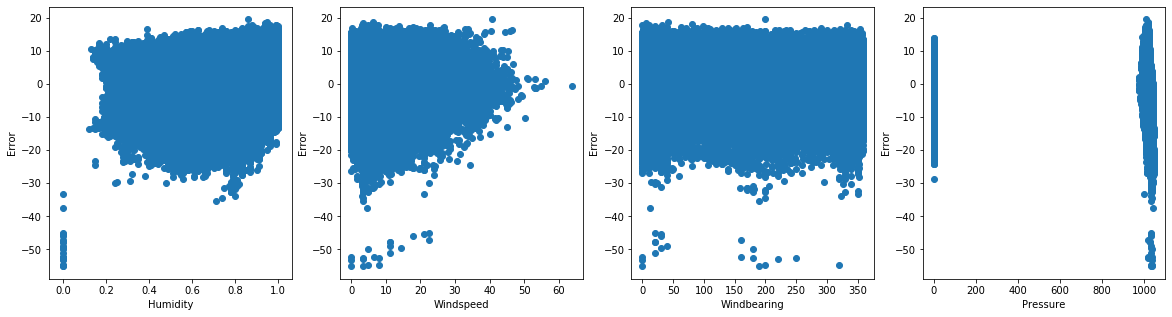

In [44]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.scatter(X['humidity'], errors)
plt.xlabel('Humidity')
plt.ylabel('Error')

plt.subplot(1, 4, 2)
plt.scatter(X['windspeed'], errors)
plt.xlabel('Windspeed')
plt.ylabel('Error')

plt.subplot(1, 4, 3)
plt.scatter(X['windbearing'], errors)
plt.xlabel('Windbearing')
plt.ylabel('Error')

plt.subplot(1, 4, 4)
plt.scatter(X['pressure'], errors)
plt.xlabel('Pressure')
plt.ylabel('Error')

plt.tight_layout
plt.show()

The above features are not correlated with errors.